In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def load_wine_data(path_to_dir, filename, csv_separator):
    csv_path = os.path.join(path_to_dir, filename)
    return pd.read_csv(csv_path, sep=csv_separator)
#os.path.dirname(path) return the parent directory of the given path
PARENT_DIR = os.path.dirname(os.getcwd())
WINE_DIR = os.path.join(PARENT_DIR, "Data set")
print(PARENT_DIR)
print(WINE_DIR)

G:\Learning resource\Github\WineQuality\SMSmall\Data Loader\Datdo_DataExplore\WineQuality
G:\Learning resource\Github\WineQuality\SMSmall\Data Loader\Datdo_DataExplore\WineQuality\Data set


In [24]:
df_red_wine = load_wine_data(WINE_DIR, "winequality-red.csv", ";")
df_white_wine = load_wine_data(WINE_DIR, "winequality-white.csv", ";")

# Overall Analysis: 2 Dataframe df_red_wine & df_white_wine

## 1. Showing, check the min, max, avg of the whole dataset

In [25]:
#Dat

df_red_wine.head()
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
#Dat

df_red_wine_des = df_red_wine.describe()
df_red_wine_des
df_white_wine_des = df_red_wine.describe()
df_white_wine_des

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
#Dat

df_red_wine_minmax = df_red_wine_des.loc[["mean", "max", "min"]]
print(df_red_wine_minmax)
df_white_wine_minmax = df_red_wine_des.loc[["mean", "max", "min"]]
print(df_white_wine_minmax)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       8.319637          0.527821     0.270976        2.538806   0.087467   
max       15.900000          1.580000     1.000000       15.500000   0.611000   
min        4.600000          0.120000     0.000000        0.900000   0.012000   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
mean            15.874922             46.467792  0.996747  3.311113   
max             72.000000            289.000000  1.003690  4.010000   
min              1.000000              6.000000  0.990070  2.740000   

      sulphates    alcohol   quality  
mean   0.658149  10.422983  5.636023  
max    2.000000  14.900000  8.000000  
min    0.330000   8.400000  3.000000  
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       8.319637          0.527821     0.270976        2.538806   0.087467   
max       15.900000          1.580000     1.000000       15.500000   0.6

## 2. check missing data point, plot a heat map of showing if null is exist

In [29]:
#Dat

print("Total missing values of red wine: ",df_red_wine.isnull().sum().sum())
print("Total missing values of white wine: ",df_red_wine.isnull().sum().sum())

Total missing values of red wine:  0
Total missing values of white wine:  0


## 3. Show number of samples and features using df.info() && 4. Check the info, datatype of each feature

In [30]:
#Dat

df_red_wine.info()
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

## 4. Correlation and Covariance

Ha Ngo

Check the correlation and the covariance in the dataset, choosing the most suitable graph type to visualize the corr and cov matrix.

In [31]:
df_red_cov_matrix = df_red_wine.cov()
df_white_cov_matrix = df_white_wine.cov()


In [32]:
df_red_corr_matrix = df_red_wine.corr()
df_white_corr_matrix = df_white_wine.corr()

In [33]:
df_red_corr_matrix.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907


In [34]:
df_white_corr_matrix.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934


In [35]:
df_red_cov_matrix.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900


In [36]:
df_white_cov_matrix.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.712114,-0.001931,0.029533,0.381022,0.000426,-0.708919,3.266013,0.000670,-0.054265,-0.001651,-0.125533,-0.084947
volatile acidity,-0.001931,0.010160,-0.001823,0.032865,0.000155,-0.166300,0.382354,0.000008,-0.000486,-0.000411,0.008400,-0.017382
citric acid,0.029533,-0.001823,0.014646,0.057829,0.000302,0.193630,0.622989,0.000054,-0.002992,0.000861,-0.011278,-0.000987
residual sugar,0.381022,0.032865,0.057829,25.725770,0.009828,25.800578,86.531303,0.012727,-0.148684,-0.015435,-2.812740,-0.438316
chlorides,0.000426,0.000155,0.000302,0.009828,0.000477,0.037674,0.184687,0.000017,-0.000298,0.000042,-0.009684,-0.004062


In [37]:
print(df_red_cov_matrix["quality"].sort_values(ascending=False))

quality                 0.652168
alcohol                 0.409789
fixed acidity           0.174424
citric acid             0.035612
sulphates               0.034413
residual sugar          0.015635
density                -0.000267
chlorides              -0.004900
pH                     -0.007198
volatile acidity       -0.056476
free sulfur dioxide    -0.427907
total sulfur dioxide   -4.917237
Name: quality, dtype: float64


In [38]:
print(df_white_cov_matrix["quality"].sort_values(ascending=False))

quality                 0.784356
alcohol                 0.474726
free sulfur dioxide     0.122878
pH                      0.013297
sulphates               0.005425
density                -0.000814
citric acid            -0.000987
chlorides              -0.004062
volatile acidity       -0.017382
fixed acidity          -0.084947
residual sugar         -0.438316
total sulfur dioxide   -6.576746
Name: quality, dtype: float64


<AxesSubplot:>

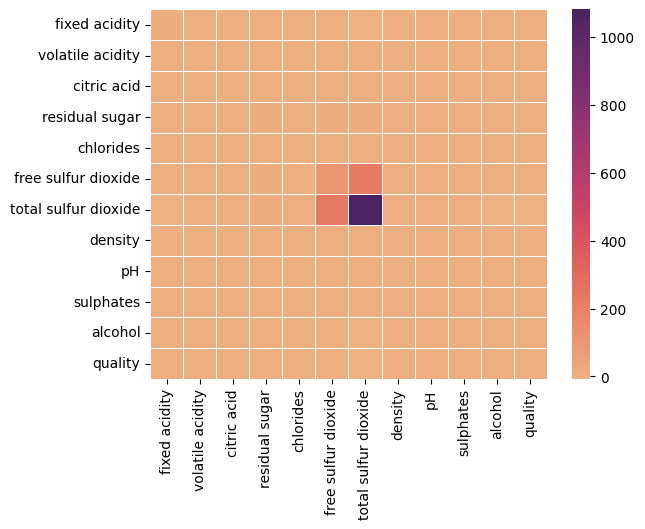

In [39]:
# Graph red_ cov using heat map 
sns.heatmap(df_red_cov_matrix, cmap="flare", linewidths=0.5)

<AxesSubplot:>

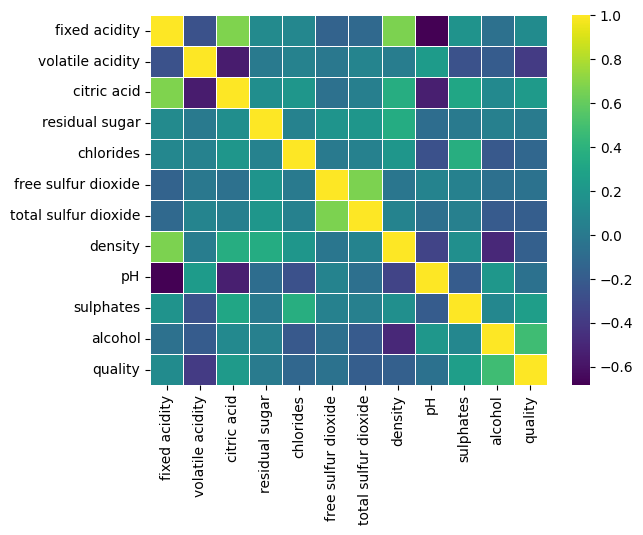

In [40]:
# Graph red_ corr using heat map 
sns.heatmap(df_red_corr_matrix, cmap="viridis", linewidths=0.5)

<AxesSubplot:>

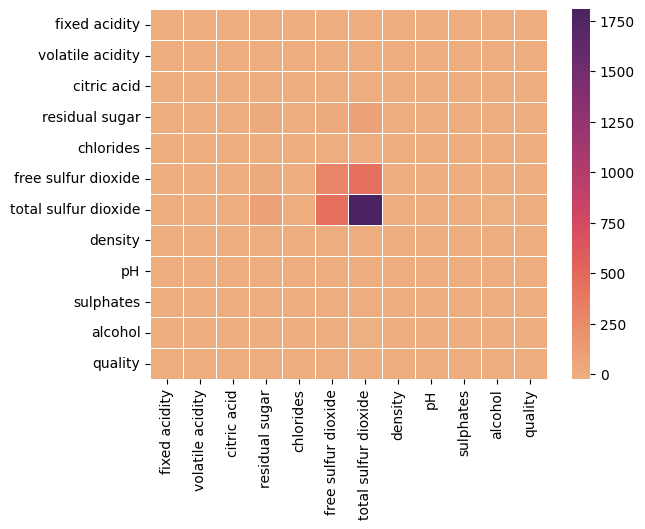

In [41]:
# Graph white_ cov using heat map 
sns.heatmap(df_white_cov_matrix, cmap="flare", linewidths=0.5)

<AxesSubplot:>

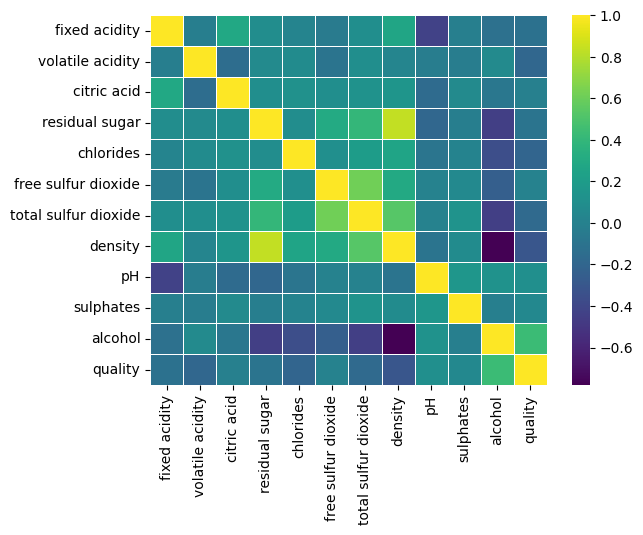

In [42]:
# Graph white_ corr using heat map 
sns.heatmap(df_white_corr_matrix, cmap="viridis", linewidths=0.5)

# Deep Analysis

## Create scatter plots between every 2 pairs of features: 

## Showing the range of each feature

 Ha Ngo

In [43]:
for i in range(0,12):
    
    min = df_red_wine.iloc[:,i:i+1].min().values
    max = df_red_wine.iloc[:, i:i+1].max().values
    minus = max - min
    print("The range of {}".format(df_red_wine.columns[i]) + " of the dataset %.2f" % minus)

The range of fixed acidity of the dataset 11.30
The range of volatile acidity of the dataset 1.46
The range of citric acid of the dataset 1.00
The range of residual sugar of the dataset 14.60
The range of chlorides of the dataset 0.60
The range of free sulfur dioxide of the dataset 71.00
The range of total sulfur dioxide of the dataset 283.00
The range of density of the dataset 0.01
The range of pH of the dataset 1.27
The range of sulphates of the dataset 1.67
The range of alcohol of the dataset 6.50
The range of quality of the dataset 5.00


In [44]:
for i in range(0,12):
    
    min = df_white_wine.iloc[:,i:i+1].min().values
    max = df_white_wine.iloc[:, i:i+1].max().values
    minus = max - min
    print("The range of {}".format(df_white_wine.columns[i]) + " of the dataset %.2f" % minus)

The range of fixed acidity of the dataset 10.40
The range of volatile acidity of the dataset 1.02
The range of citric acid of the dataset 1.66
The range of residual sugar of the dataset 65.20
The range of chlorides of the dataset 0.34
The range of free sulfur dioxide of the dataset 287.00
The range of total sulfur dioxide of the dataset 431.00
The range of density of the dataset 0.05
The range of pH of the dataset 1.10
The range of sulphates of the dataset 0.86
The range of alcohol of the dataset 6.20
The range of quality of the dataset 6.00


## Create histogram subplots to visualize all features

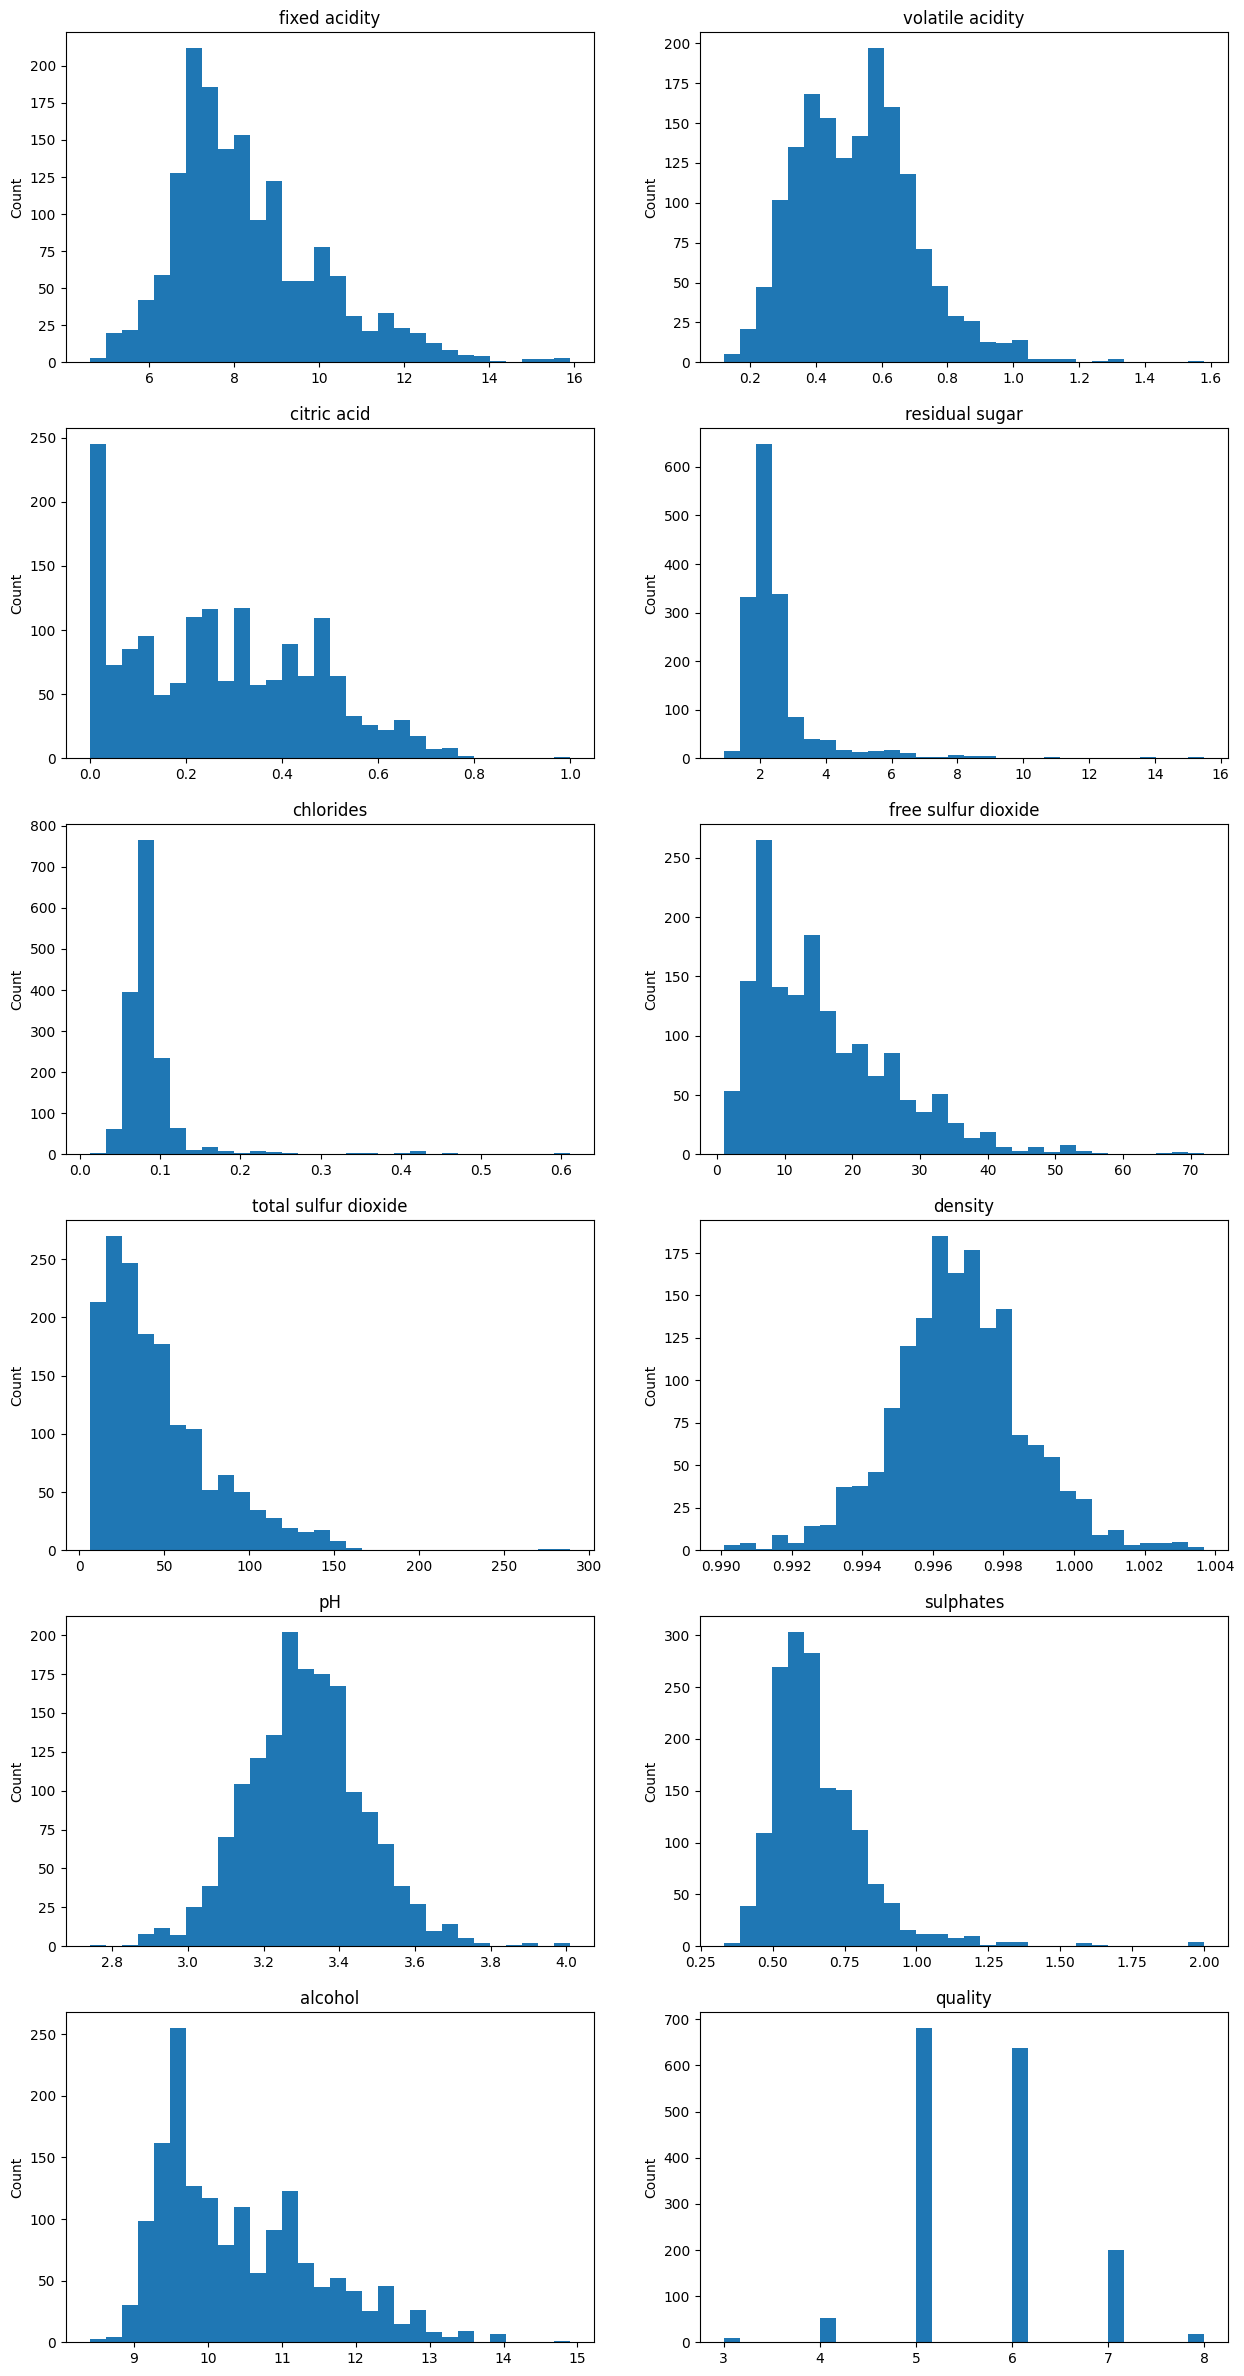

In [45]:
#Dat
# Red_wine histogram

fig, axs = plt.subplots(6, 2, figsize=(15,30))
ndarray_red_features = df_red_wine.columns.values.reshape(6,2)
for i in range(6):
    for j in range(2):
        feature = ndarray_red_features[i, j]
        df_red_wine[feature].plot(kind="hist", bins=30, ax=axs[i, j])
        axs[i,j].set(title = feature, ylabel="Count")

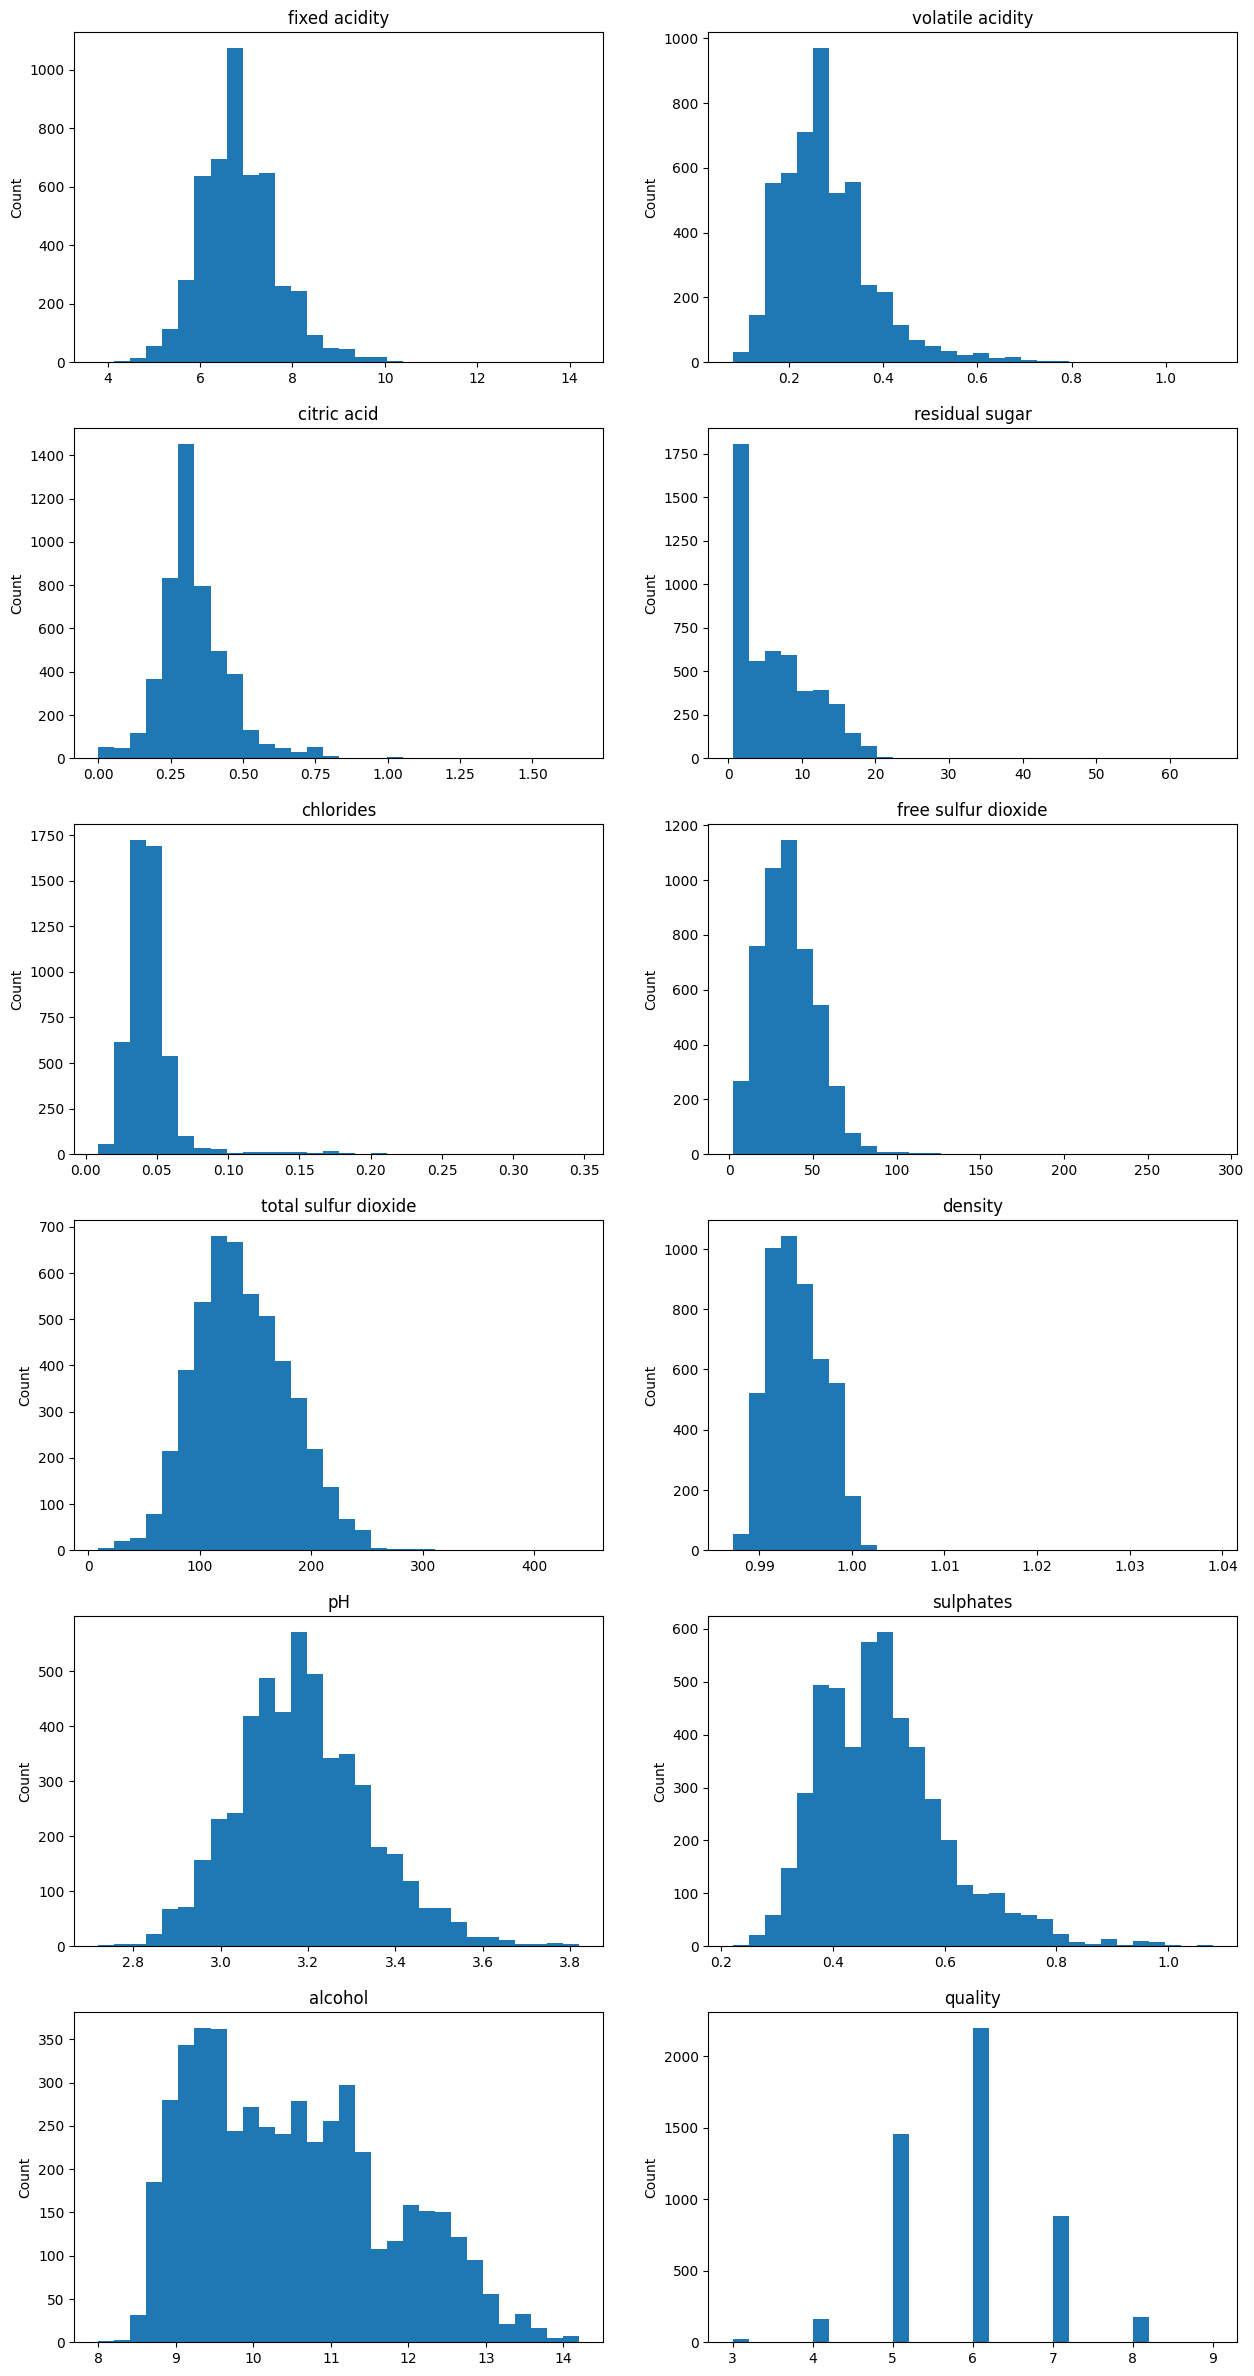

In [46]:
#Dat
# White_wine histogram

fig, axs = plt.subplots(6, 2, figsize=(15,30))
ndarray_white_features = df_white_wine.columns.values.reshape(6,2)
for i in range(6):
    for j in range(2):
        feature = ndarray_white_features[i, j]
        df_white_wine[feature].plot(kind="hist", bins=30, ax=axs[i, j])
        axs[i,j].set(title = feature, ylabel="Count")

## Create visualization plots for every feature

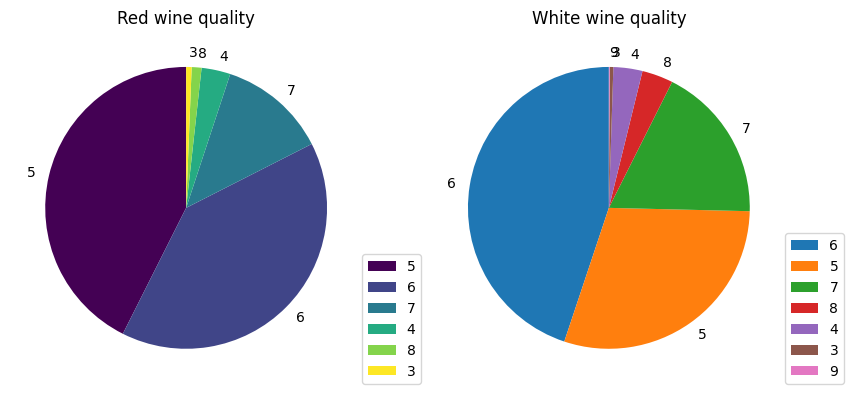

In [114]:
#Dat

fig, axs = plt.subplots(1, 2, figsize=(10,10))

# Red_wine quality pie chart

red_wine_quality = df_red_wine['quality'].value_counts()
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 10, 50))
plt.subplot(1,2,1)
plt.pie(red_wine_quality, startangle=90, labels=red_wine_quality.index, colors=colors)
plt.title("Red wine quality")
plt.legend(loc = (1,0))

# White_wine quality pie chart

white_wine_quality = df_white_wine['quality'].value_counts()
plt.subplot(1,2,2)
plt.pie(white_wine_quality, startangle=90, labels=white_wine_quality.index)
plt.title("White wine quality")
plt.legend(loc = (1,0))

Text(0, 0.5, 'samples')

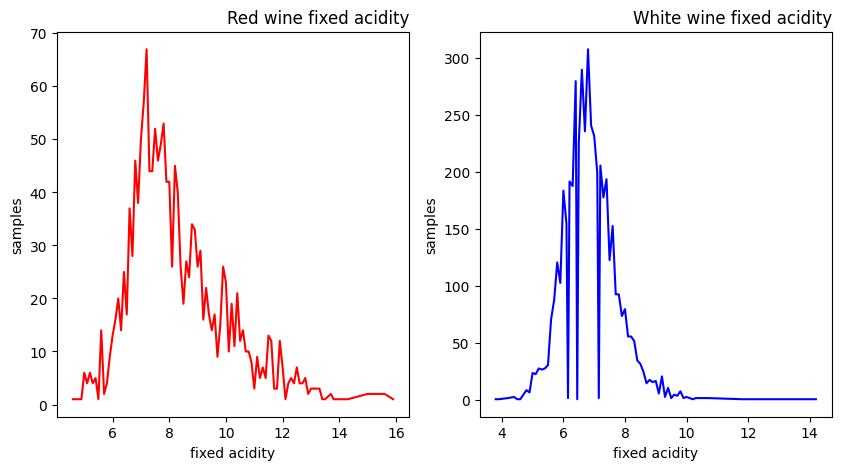

In [53]:
#Dat

# Fixed_acidity line chart

red_wine_fixed_acidity = df_red_wine['fixed acidity'].value_counts()
white_wine_fixed_acidity = df_white_wine['fixed acidity'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10,5))

plt.subplot(1,2,1)
sns.lineplot(data = red_wine_fixed_acidity, color='r')
plt.xlabel("fixed acidity")
plt.ylabel("samples")
plt.title("Red wine fixed acidity", loc='right')

plt.subplot(1,2,2)
sns.lineplot(data = white_wine_fixed_acidity, color='b')
plt.title("White wine fixed acidity", loc='right')
plt.xlabel("fixed acidity")
plt.ylabel("samples")

Text(-3, -0.2, 'Red wine/White wine volatile acidity')

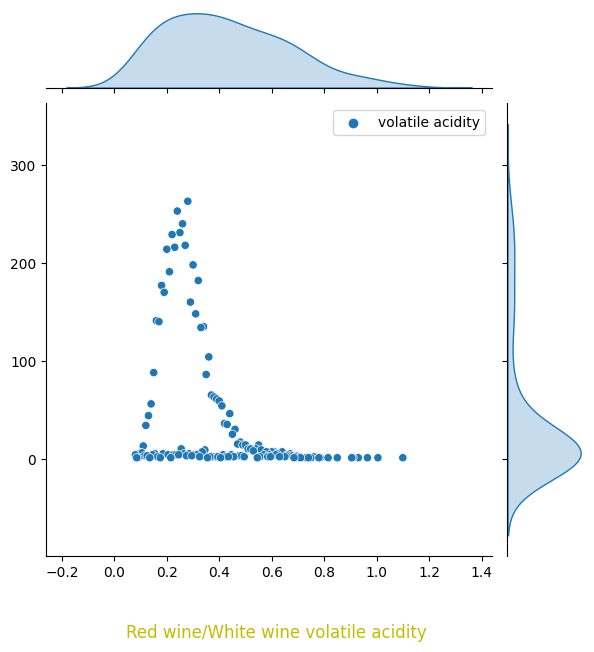

In [64]:
#Dat

# Volatile_acidity joint chart

red_wine_volatile_acidity = df_red_wine['volatile acidity'].value_counts()
white_wine_volatile_acidity = df_white_wine['volatile acidity'].value_counts()

sns.jointplot(data=[red_wine_volatile_acidity, white_wine_volatile_acidity])
plt.title("Red wine/White wine volatile acidity", x=-3,y=-0.2, color='y')

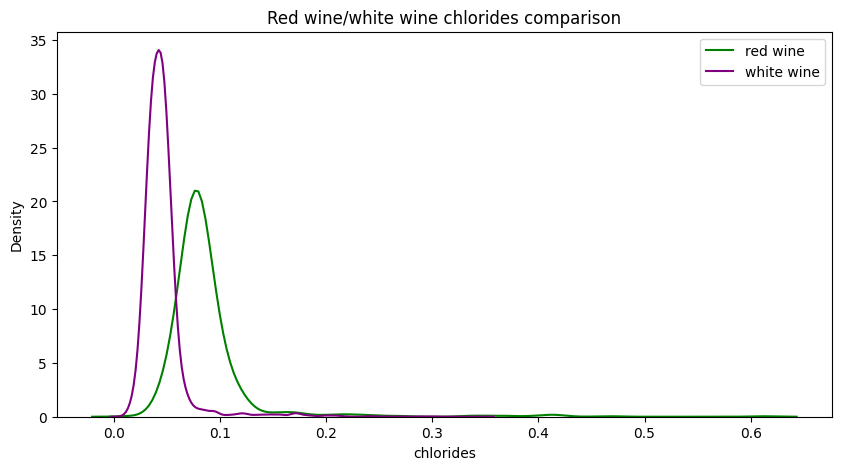

In [116]:
#Dat

# Chlorides kdeplot

# red_wine_chlorides = df_red_wine.iloc[:, 4]/df_red_wine.iloc[:, 4].sum()
red_wine_chlorides = df_red_wine.iloc[:, 4]
white_wine_chlorides = df_white_wine.iloc[:, 4]

plt.figure(figsize = (10,5))
sns.kdeplot(data = red_wine_chlorides, label = 'red wine', color = 'g')
sns.kdeplot(data = white_wine_chlorides, label = 'white wine', color = 'purple')
plt.title("Red wine/white wine chlorides comparison")
plt.legend()


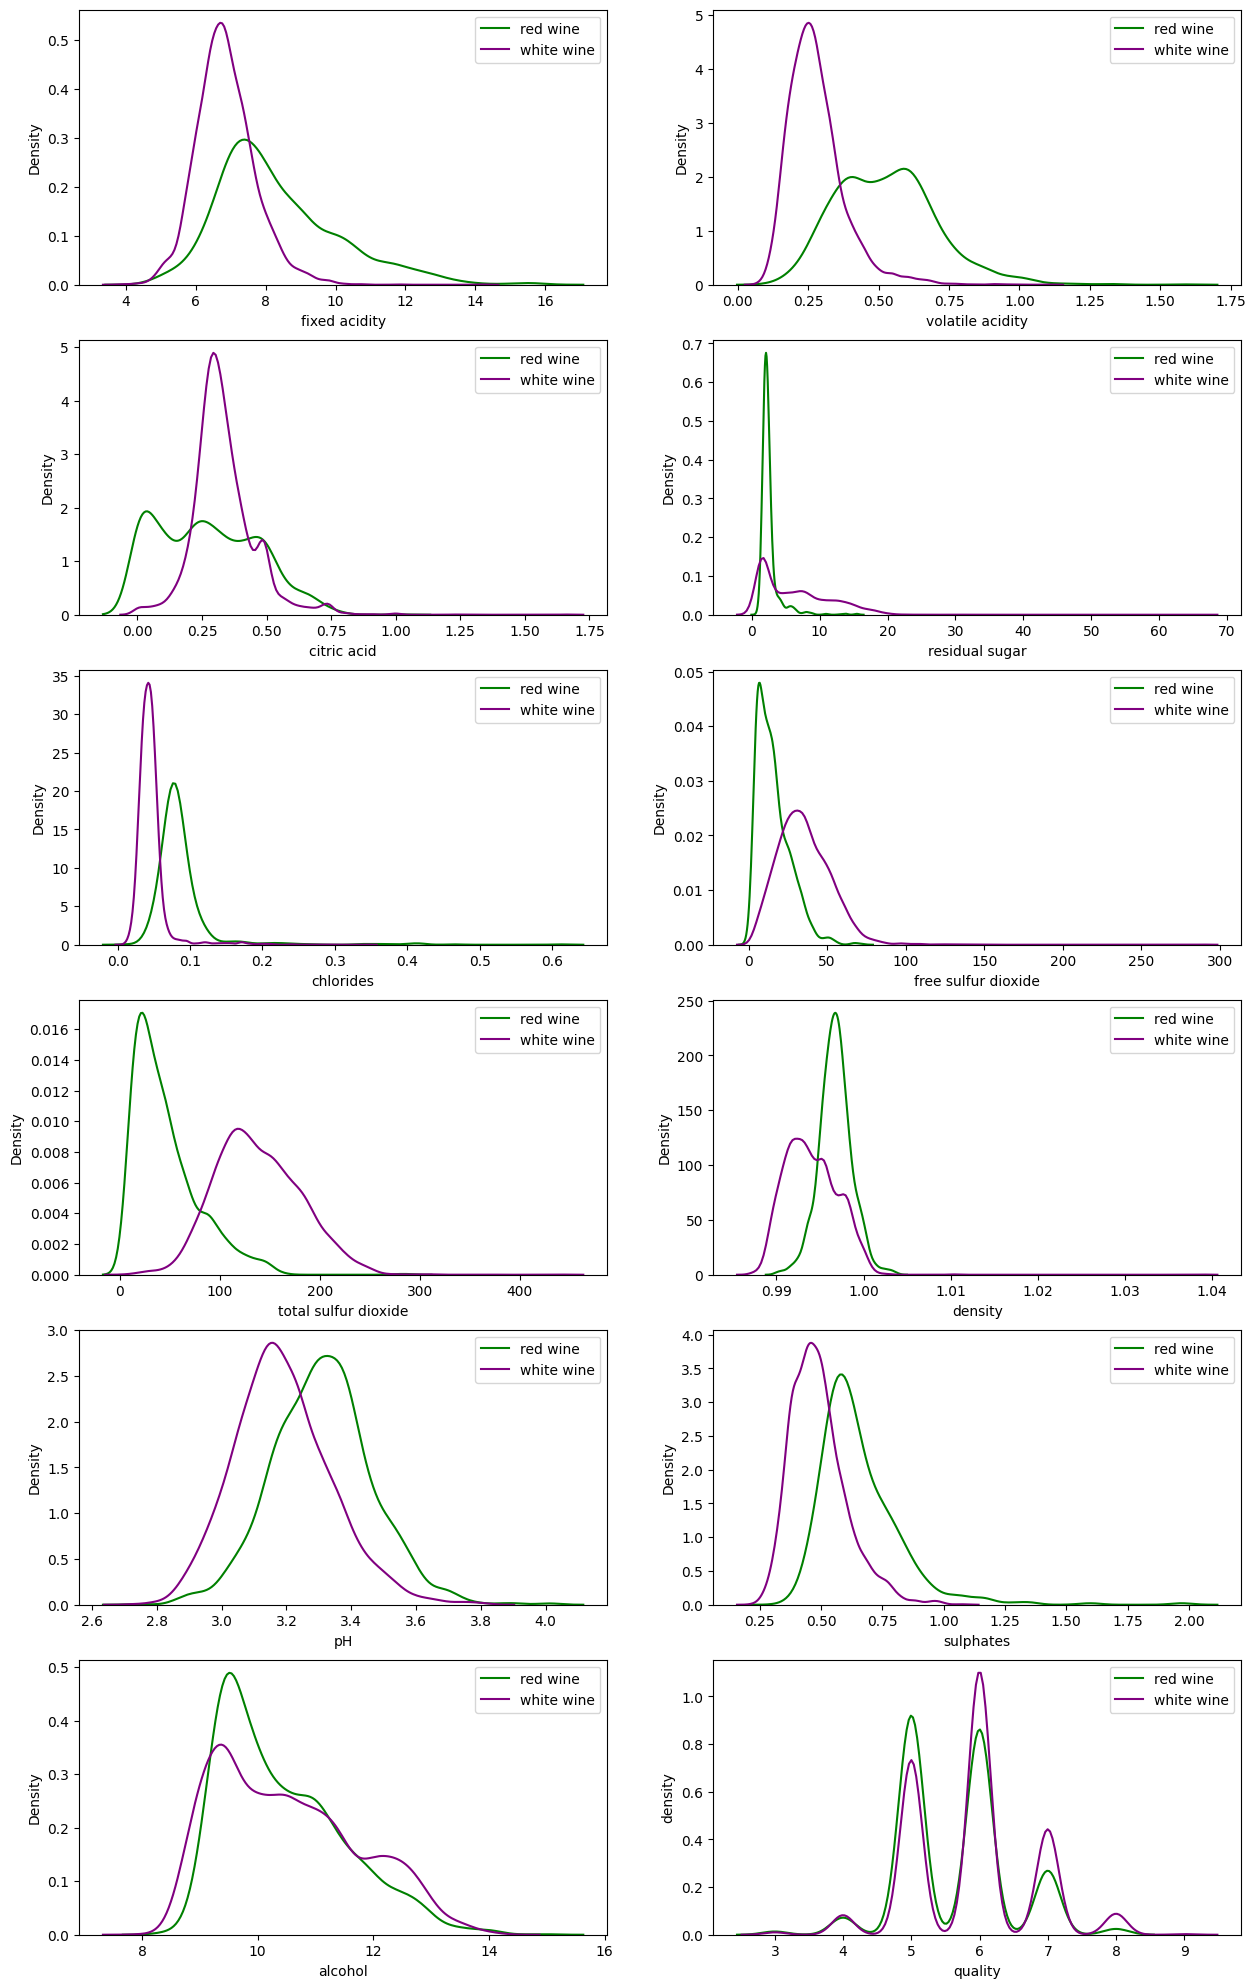

In [135]:
#Dat

fig, axs = plt.subplots(6, 2, figsize = (15,25))
for i in range(6):
    for j in range(2):
        feature = ndarray_red_features[i, j]
        sns.kdeplot(data = df_red_wine[feature], ax = axs[i, j], label = 'red wine', color = 'g')
        sns.kdeplot(data = df_white_wine[feature], ax = axs[i, j], label = 'white wine', color = 'purple')
        plt.xlabel(feature)
        axs[i, j].set(y = 'densi')
        axs[i, j].legend()
        
        

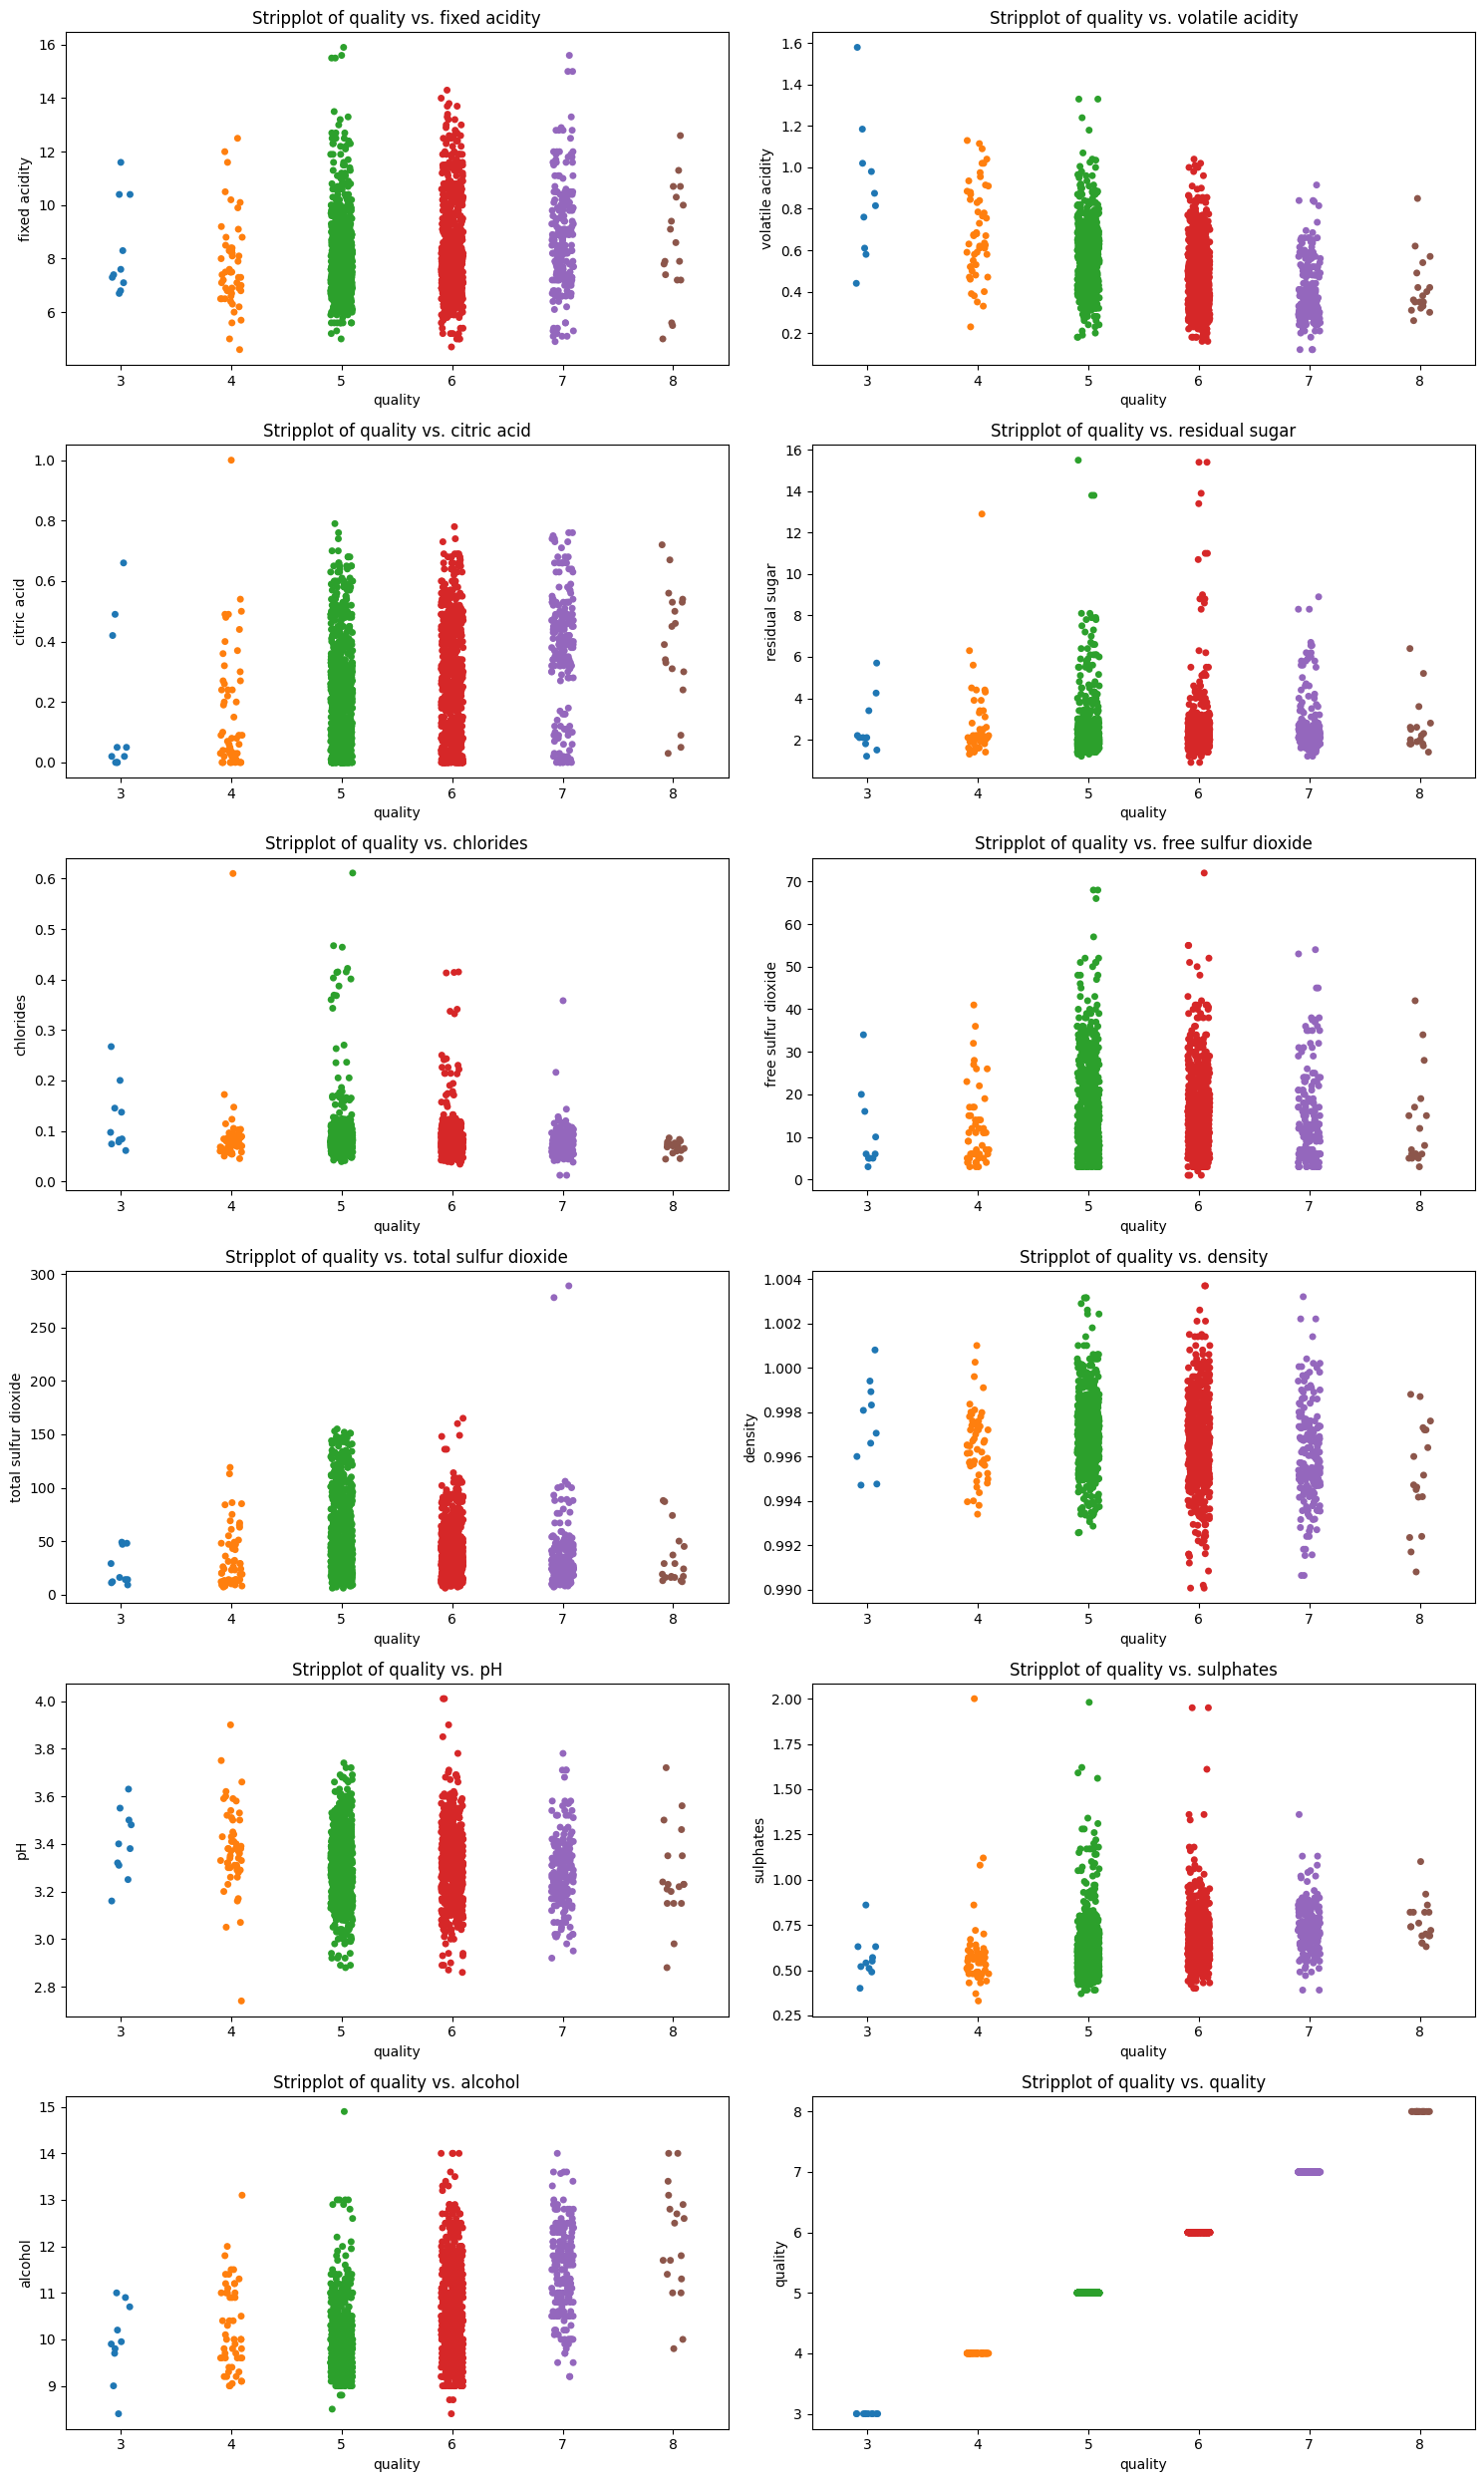

In [54]:
#Dat

# Stripplot of quality/features

fig, axes = plt.subplots(6, 2, figsize=(15, 25))
for i in range(6):
    for j in range(2):
        sns.stripplot(x="quality", y=ndarray_white_features[i, j], data=df_red_wine, ax=axes[i, j])
        axes[i, j].set_title(f"Stripplot of quality vs. {ndarray_white_features[i, j]}")
fig.tight_layout()

# Draft

> hl271

## 3. Suggest ML Algorithm to classify the wine's quality

### Approach 1: Convert to Regression Problem: 

- Suggested Model
    - Multiple Linear Regression Model
- Feature Selection: Choose 4-5 most correlated features to wine's quality (Ex: alcohol, acid_citric, sulphate, volatile acidity) 
- Round up the predicted quality to integer value

### Approach 2: Classification Problem

- For simplifying purpose, we can use **binary classification**: classify wine's quality is 
    - bad if quality <=5
    - good if quality >5
- Suggested Models:
    - Support Vector Classifier
    - Decision Tree/ Random Forest Classifier

> hl271

## 4. Suggest ML Algorithm to group wine based on its features
- This is a **Clustering** problem
- Suggested Model:
    - K-Means